# FLIGHT PRICE PREDICTION

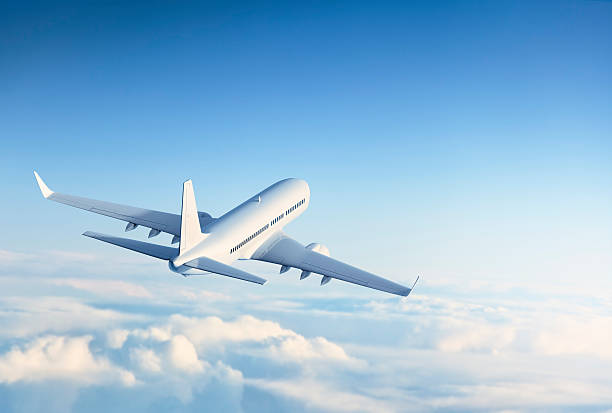

In [4]:
# displaying flight image

# Do not run this code as image is only saved
# in the original local jupyter folder
from IPython.display import Image 
Image("flight_img.jpg")

## 1. Domain Analysis


Travelers are constantly looking for flights at best deal to travel to places. But the prices of flights keep changing constantly. Flight prices vary widely depending on a number of factors, including the date of travel, the time of day, the airline, the route, and the availability of seats. This can make it difficult for travelers to find the best deals on flights.

### Analysis:

The given dataset comprises of various factors that affect the Price of flight. 
The independent variables(X) are :

>>	Airlines- Types of airlines affect the prices of flight. Here, the various airlines are GoAir, IndiGo, Jet Airways, Air India ,Vistara, Spice Jet, etc.

>>	Date of Journey- Date of Journey affect the prices of ticket. Tickets are expensive during the time where its demands are high/ or when people are travelling more, example- festivals, holidays, summer vacations, weekends, school breaks, etc.

>>	Source- The source here means place from where the file departs. The passengers journey will start from here. Demand, competition, operating costs, etc. affect the flight price at source.

>>	Destination- Destination means where the flight is headed. Popular destinations have higher prices.

>>	Route- The route /way the customer wants to travel also affects the price of his/her flight.

>>	Departure Time-  Time of departure impact the price of flight. Usually, flights that depart early in the morning or late in the evening are often more expensive than flights that depart during the middle of the day.

>>	Arrival Time- It is the time the flight lands in the destination. 

>>	Duration- The time it takes the flight to reach the destination is called duration. Longer the duration, higher the price.

>>	Total Stops- This is the number of places the flight stops on the way to its destination.

>>	Additional Info- Any additional services and amenities are included here. This column also includes whether or not meals are serves in flights. Meals have additional charges and can affect the final cost of flights.

### The dependent variable(y) is:
Price of flight- All the above features we discussed have some impact on the price of flight. 
However, not all the independent variables affect the dependent in the same manner. The independent variables that affect the dependent variable(Flight Price) the most will be considered for further analysis and model creation.


### Business case: 
Our goal is to predict the prices of flight on the basis of attributes discussed above.
We are going to create a Machine Learning Model to predict flight prices based on historical data. This model can then be used to help travelers find the best deals on flights.  


### Benefits:
The predictive model can help travelers to:

•	Find the best deals on flights

•	Save money on travel

•	Make more informed travel decisions

### The predictive model can help airlines to:
•	Optimize their pricing strategies

•	Increase their revenue

•	Improve their customer satisfaction

### Relationship between independent and dependent variables:

With the use of line chart in Power BI, the relationship between all the independent variables with the dependent variable was observed.
All features show some relationship between Flight price except Date of Departure and Additional Info. Hence, we consider these columns redundant and remove them during further analysis. 


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import datetime
import time
from datetime import timedelta
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_excel("Flight_Fare.xlsx")

## 2. Basic checks 

In [4]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
data.shape

(10683, 11)

* <b><font color="green">Size of the Dataset: </b>

The dataset contains 10683 data records, which is a moderately large dataset. This can provide a substantial amount of information for analysis.

In [9]:
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 10683
Number of columns: 11


In [10]:
data.size

117513

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [12]:
# describe ( for categorical values)
data.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


### Insights

* <b><font color="green">Mean Price:</b> 

The average price of the flights in the dataset is approximately 9087. This represents the central tendency of the prices. It can serve as a reference point to understand the typical cost of flights in the dataset.

* <b><font color="green">Standard Deviation: </b>

The standard deviation of approximately 4611 indicates the spread or dispersion of prices around the mean. A higher standard deviation suggests that the prices in the dataset vary widely from the average. In this case, the relatively high standard deviation suggests that flight prices have a significant degree of variability.

* <b><font color="green">Minimum Price: </b>

The lowest recorded price in the dataset is 1759. This information indicates that there are relatively affordable flight options available in the dataset.

* <b><font color="green">Maximum flight price : </b>

The maximum flight price of 79512 indicates that there are some relatively expensive flight options included in the data, possibly for premium or long-distance flights or special classes.

In [13]:
print("Data types of columns:")
print(data.dtypes)

Data types of columns:
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


* The data consists of 10 categorical columns and 1 numerical column.


In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
# Check for missing values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [16]:
# check percentage of missing values
data.isnull().sum()/len(data)

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.000094
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.000094
Additional_Info    0.000000
Price              0.000000
dtype: float64

* Only Two rows with missing values from 10683. This two rows can be considered for removal in subsequent data cleaning processes. 

In [17]:
# converting to pandas dataframe
df = pd.DataFrame(data)

In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [19]:
# Replace 'Delhi' with 'New Delhi' in the 'Destination' column
# as we need to clean the data before analysing it
df['Destination'] = df['Destination'].replace('Delhi', 'New Delhi')

In [20]:
# checking unique values in destination column
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

## 3. Exploratory data analysis(EDA)

### Univariate analysis
* Analysing single variables
* check the distribution of each column

In [21]:
!pip install sweetviz

In [22]:
import sweetviz as sv #importing sweetviz library 
my_report = sv.analyze(df) #syntax to use sweetviz
my_report.show_html() #Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



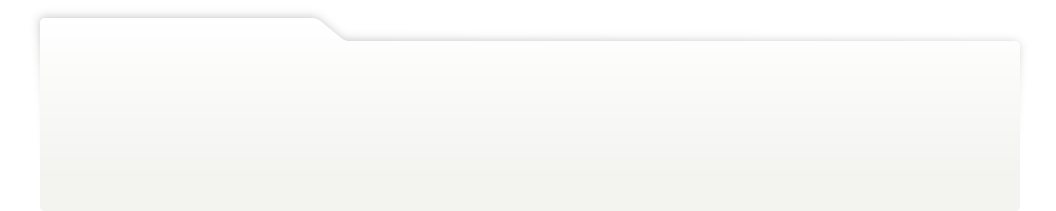
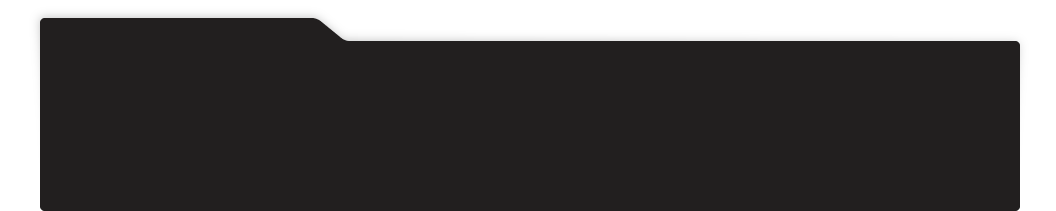
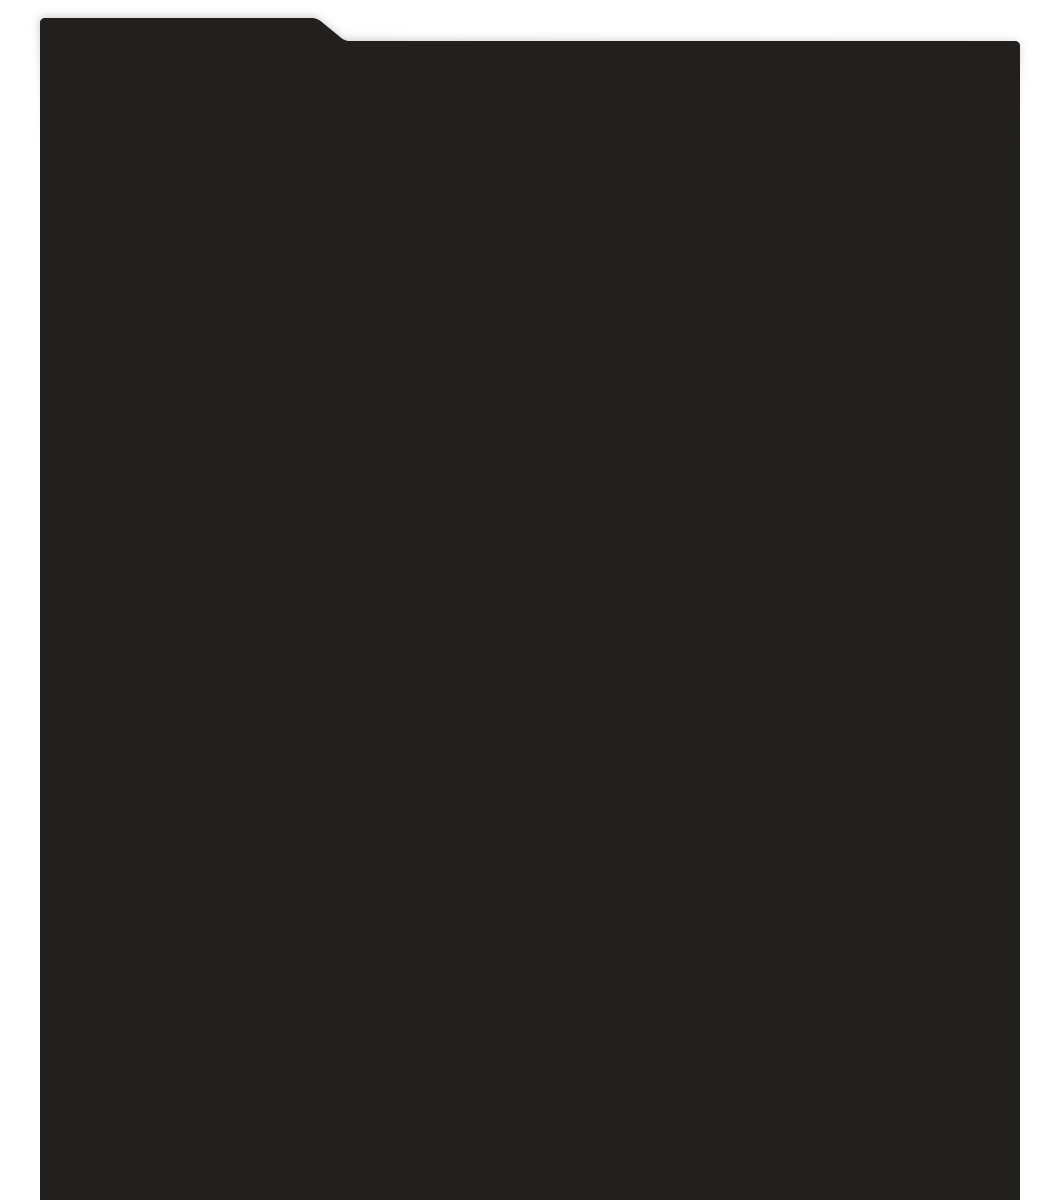
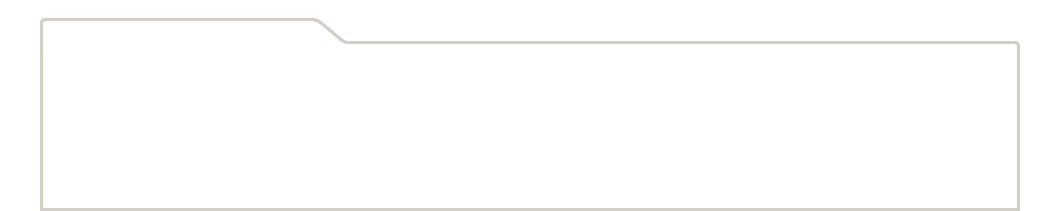
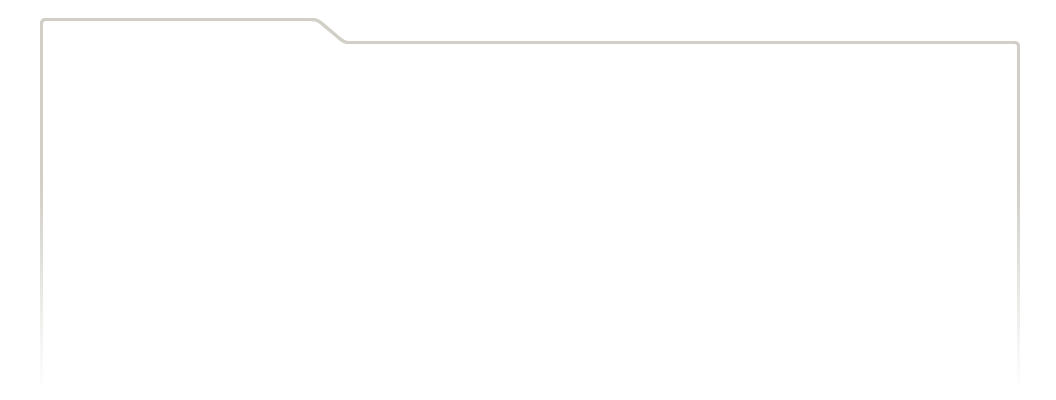
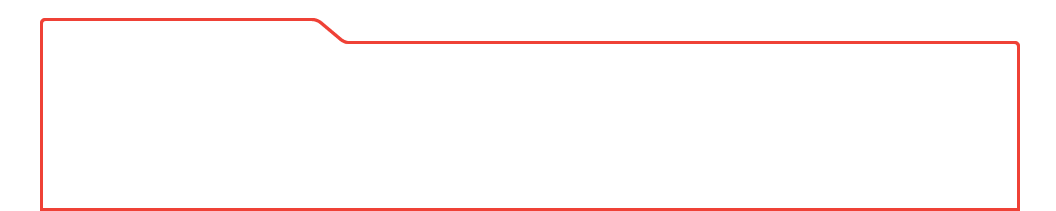
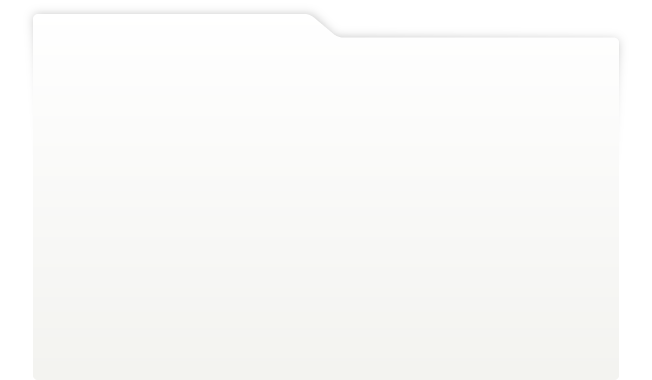
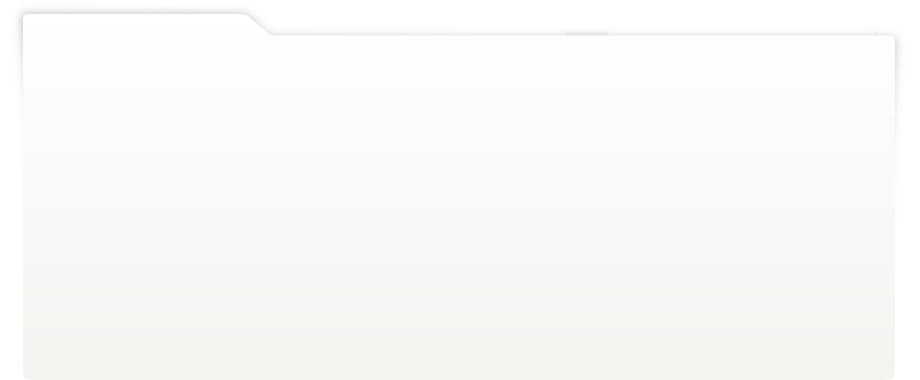
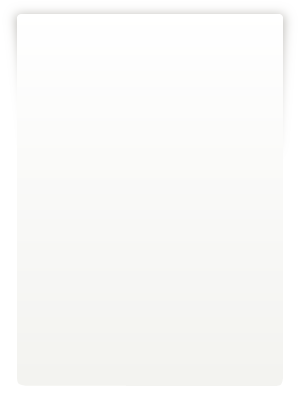
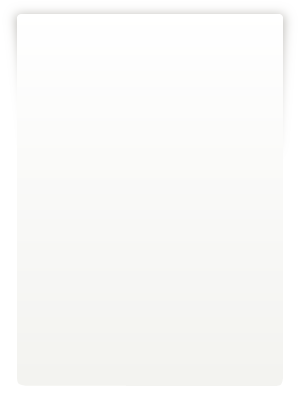
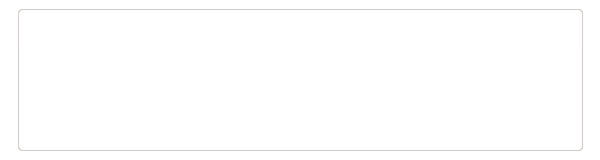
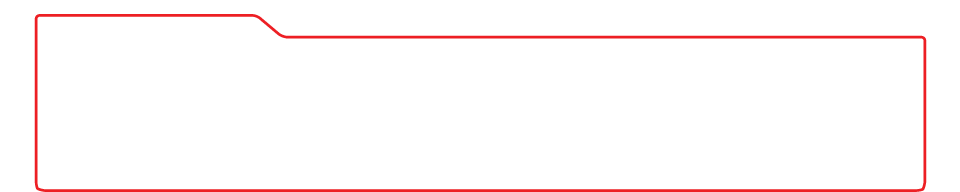
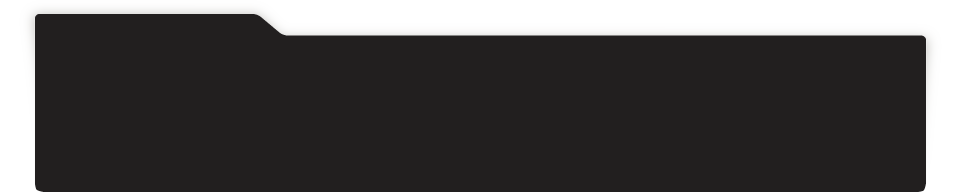
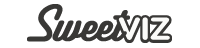
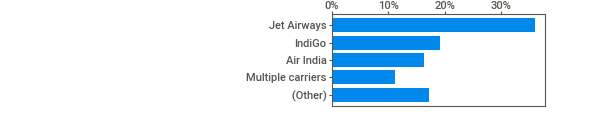
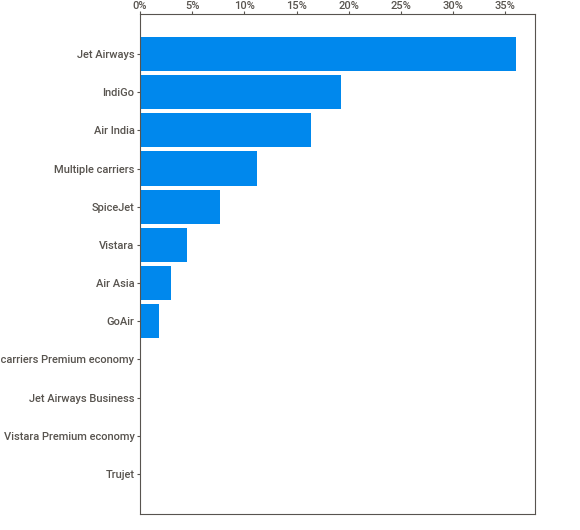
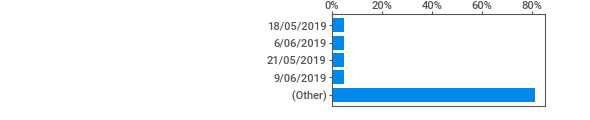
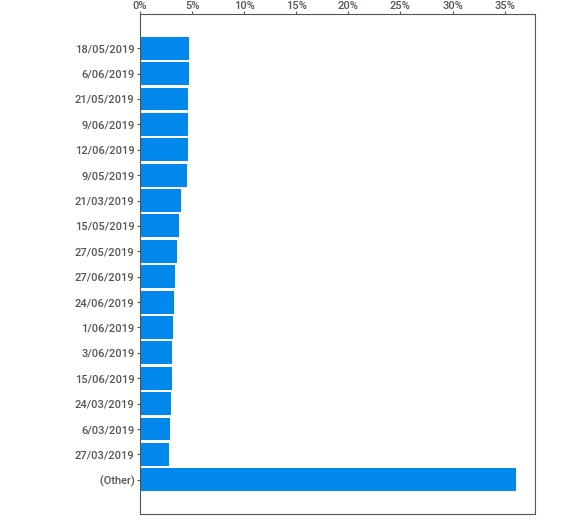
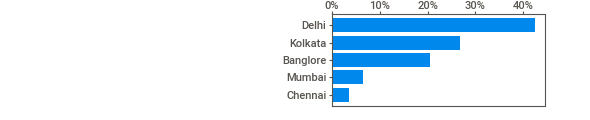
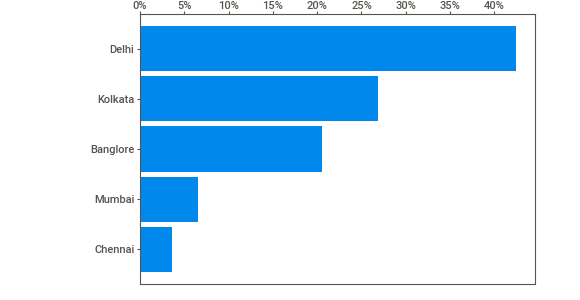
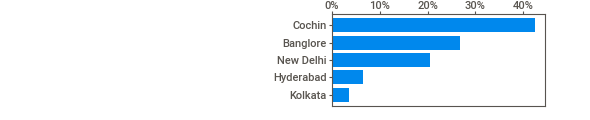
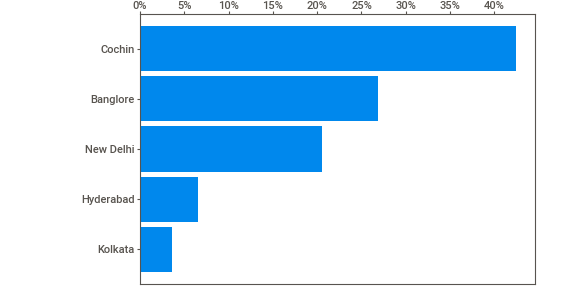
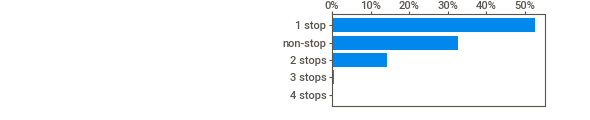
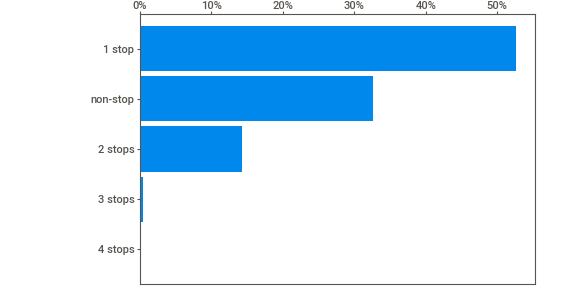
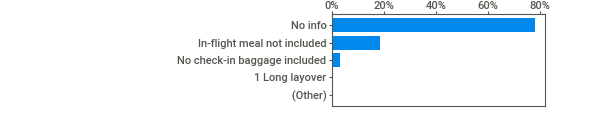
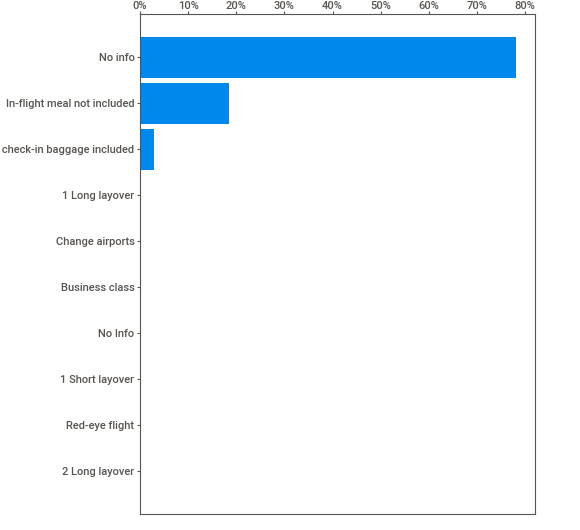
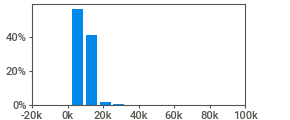
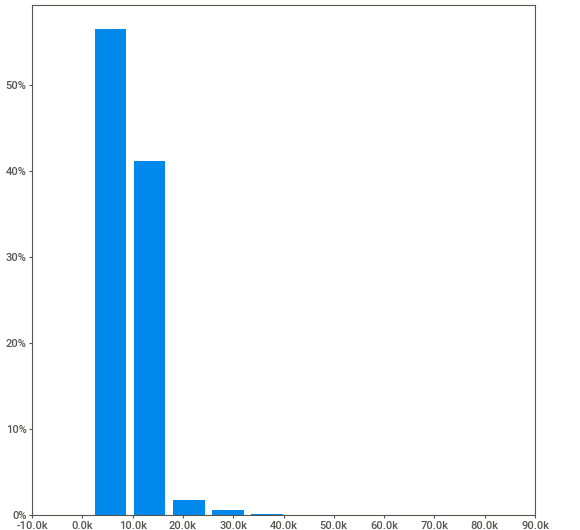
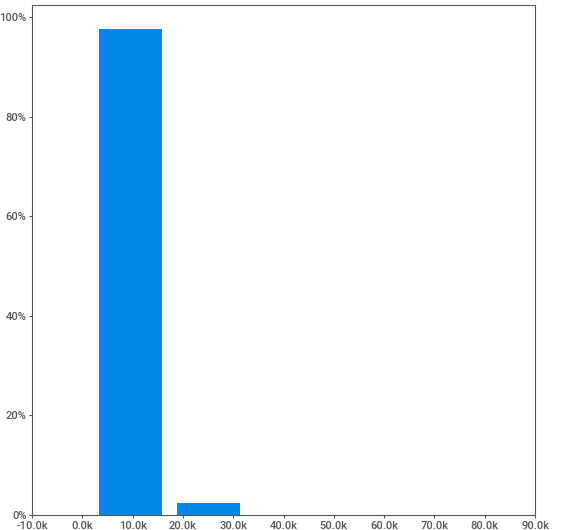
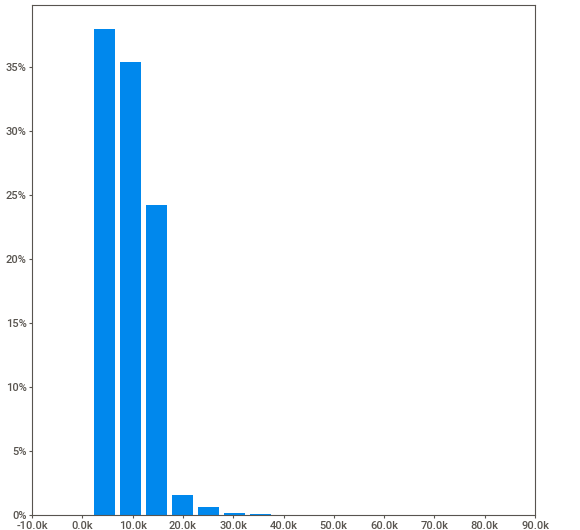
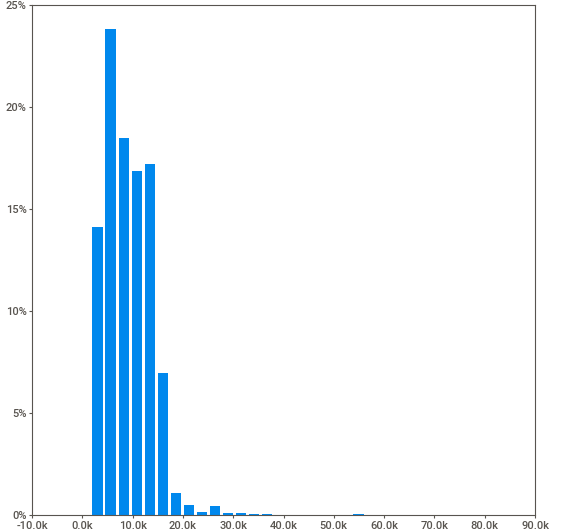
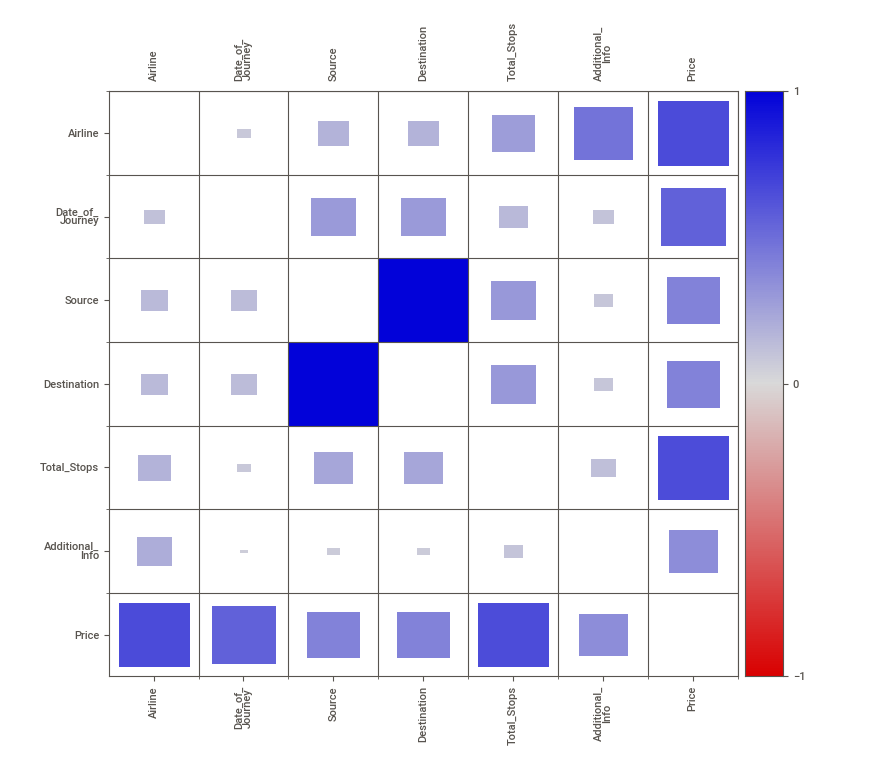
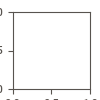

In [23]:
# incorporating sweetviz report in jupyter notebook
my_report.show_notebook()

In [24]:
## 1. Summary statistics for numerical variables 
numerical_summary = df.describe()
print("Summary statistics for numerical variables in df:\n", numerical_summary)

Summary statistics for numerical variables in df:
               Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


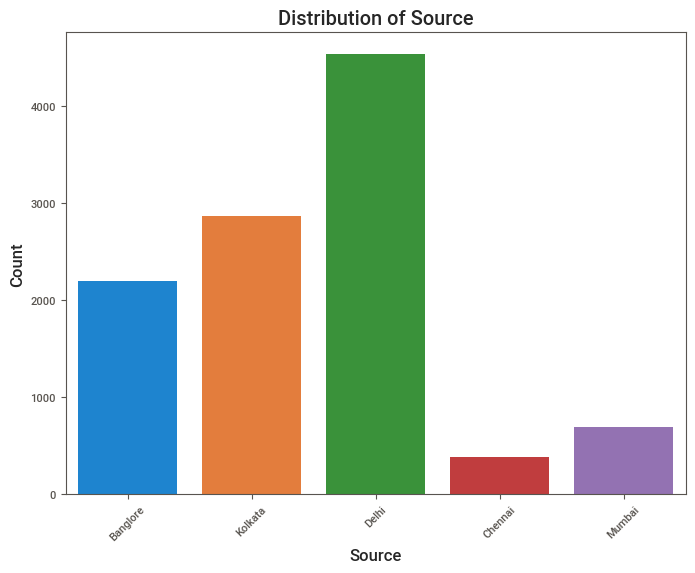

In [25]:
# 2. Distribution of 'Source' (categorical variable) using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Source', data=df)
plt.title('Distribution of Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

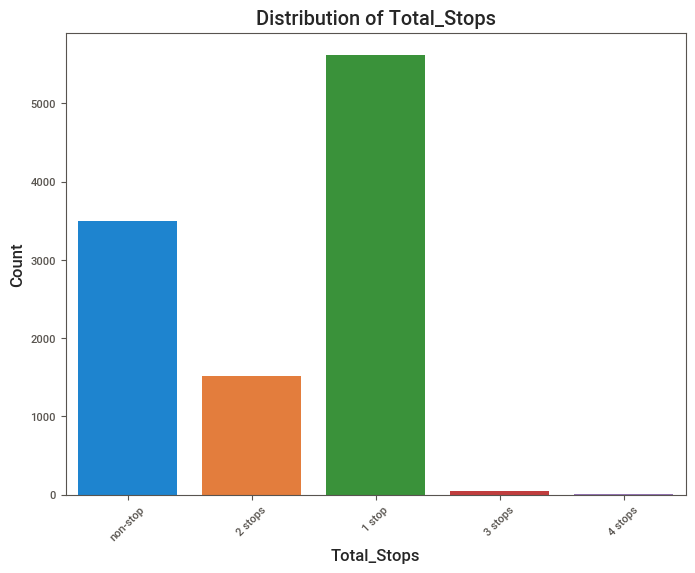

In [26]:
# 3. Distribution of 'Total_Stops' (categorical variable) using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Total_Stops', data=df)
plt.title('Distribution of Total_Stops')
plt.xlabel('Total_Stops')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

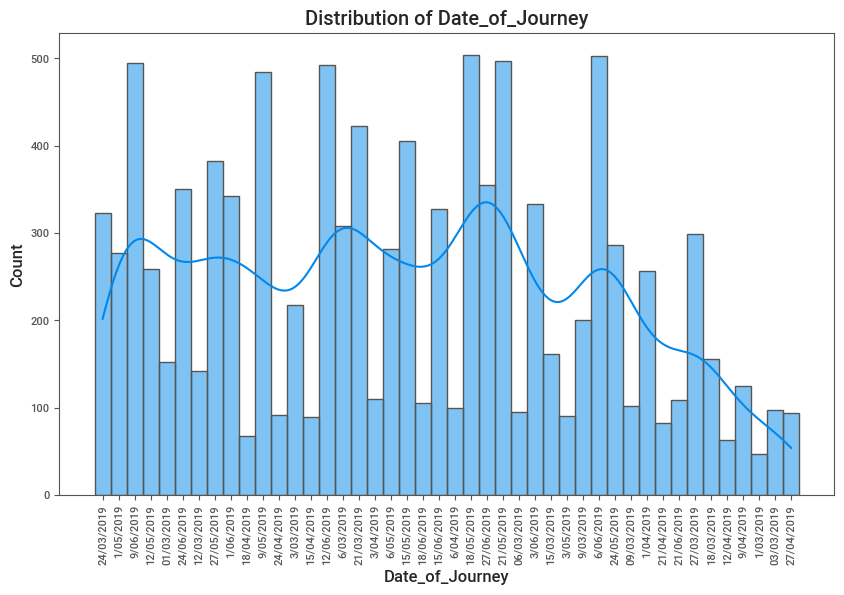

In [27]:
# 4. Distribution of 'Date_of_Journey' (date variable) using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Date_of_Journey'], bins=30, kde=True)
plt.title('Distribution of Date_of_Journey')
plt.xlabel('Date_of_Journey')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

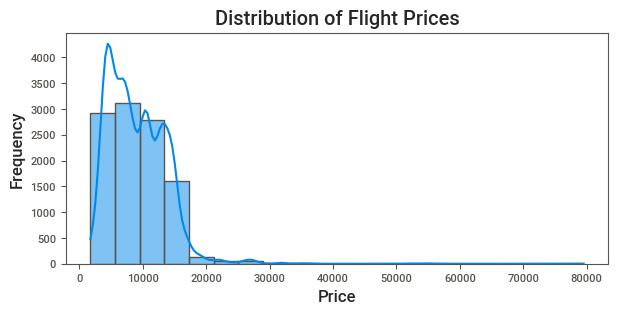

In [28]:
# Plot the distribution of prices using a histogram
plt.figure(figsize=(7, 3))
sns.histplot(data=df, x='Price', bins=20, kde=True)  
# Adjust the number of bins as needed
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.show()

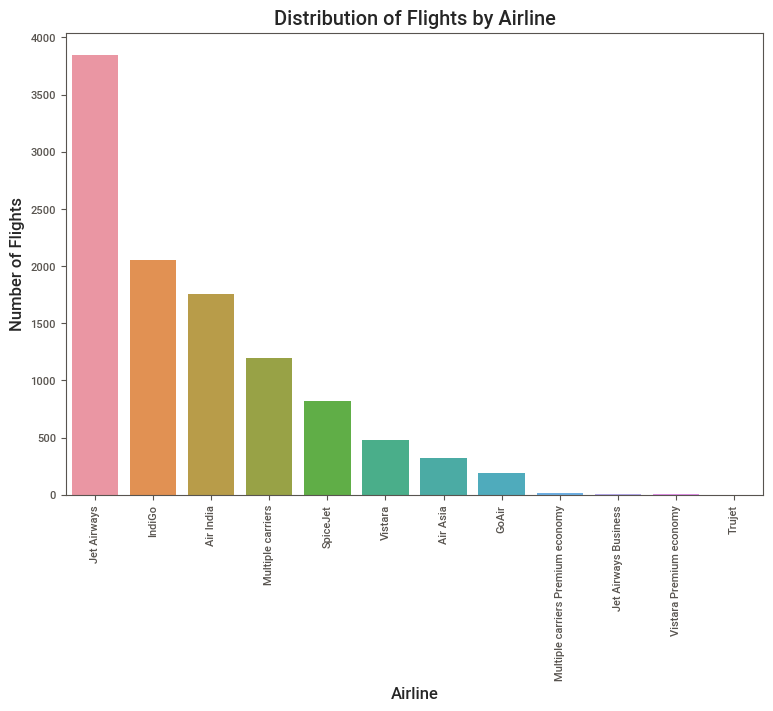

In [29]:
# Plot the distribution of flights by airline
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flights by Airline')
plt.show()

Value with the maximum frequency: 170.0


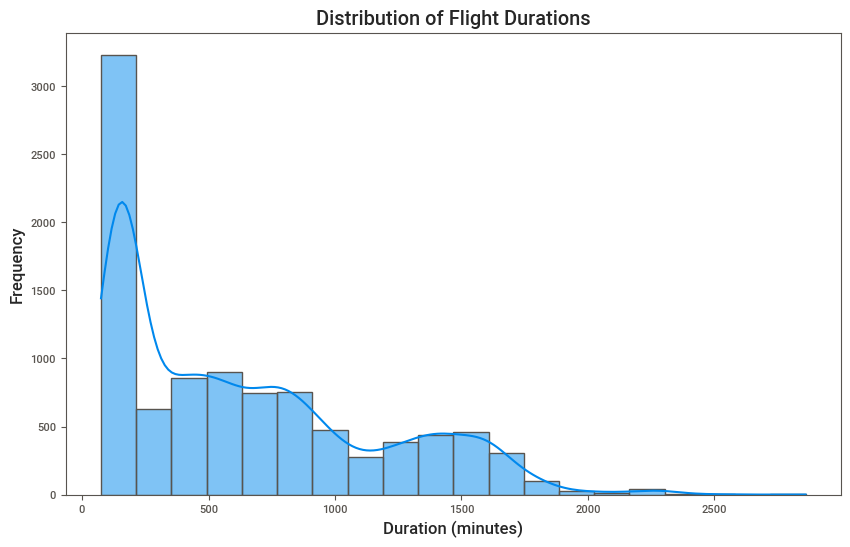

In [31]:
# Extract hours and minutes from the 'Duration' column
df['Duration_hours'] = df['Duration'].str.extract('(\d+)h').astype(float)
df['Duration_minutes'] = df['Duration'].str.extract('(\d+)m').astype(float)

# Calculate total duration in minutes
df['Total_Duration_minutes'] = df['Duration_hours'] * 60 + df['Duration_minutes']
most_common_value = df['Total_Duration_minutes'].value_counts().idxmax()
print("Value with the maximum frequency:", most_common_value)
#Plot the distribution of flight durations using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total_Duration_minutes', bins=20, kde=True)  
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Durations')
plt.show()

### Insights from Univariate Analysis:

> The price data exhibits skewness and does not follow a normal distribution.  

> Jet Airways Business have the hignest number of flights. 
    
> The most fréquent Duration of flights by minutes is approximatly 3 hours .

> Jet Airways is the most traveled airlines, followed by IndiGo and Air India. 

> In the given dataset, the source place with highest frequency of travel is Delhi followed by Kolkotta.

> People mostly travel to Cochin . Banglore is the destination that has the second highest frequency of traveling. 

> Delhi->Mumbai->Cochin is the most traveled route

> Most flights have duration of 2 hours 50 minutes

> Over 50% flights have 1 stop whereas over 30% have no stops

> Almost 20% flights don't have inflight meals and almost 5% flights do not allow check-in baggages

> Average price of flight is INR 9087. Lowest price of flight is INR 1,759 and highest price of flight is INR 79,512. 


### Bivariate Analysis

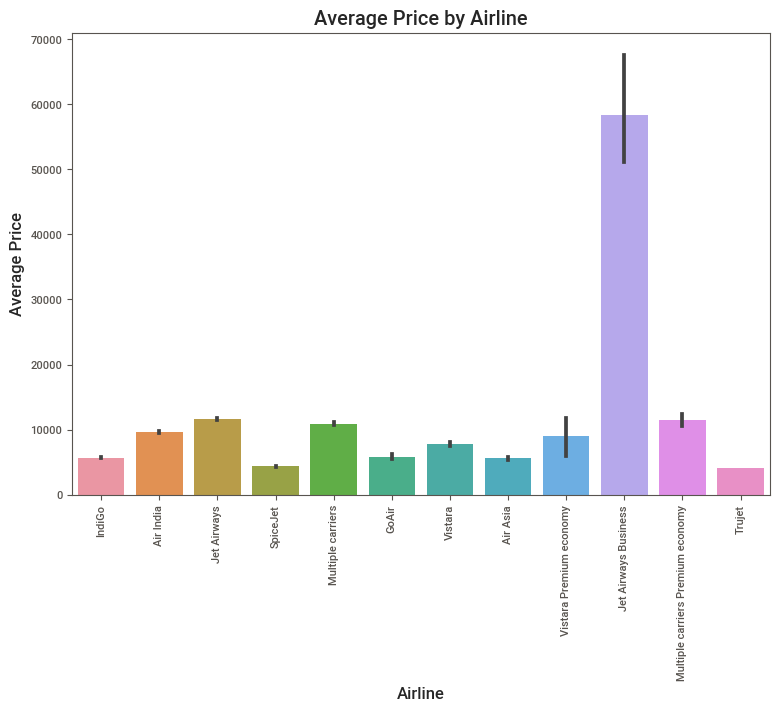

In [32]:
# Plot the distribution of Price by Airline
plt.figure(figsize=(9, 6))
sns.barplot(x='Airline', y='Price', data=df)
plt.title('Average Price by Airline')
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

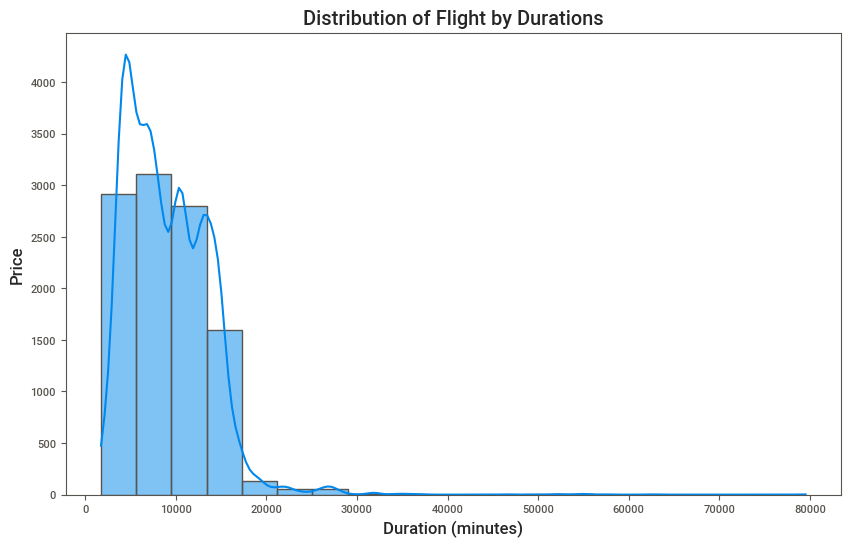

In [33]:
# Plot the distribution of price durations using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', bins=20, kde=True)  
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.title('Distribution of Flight by Durations')
plt.show()

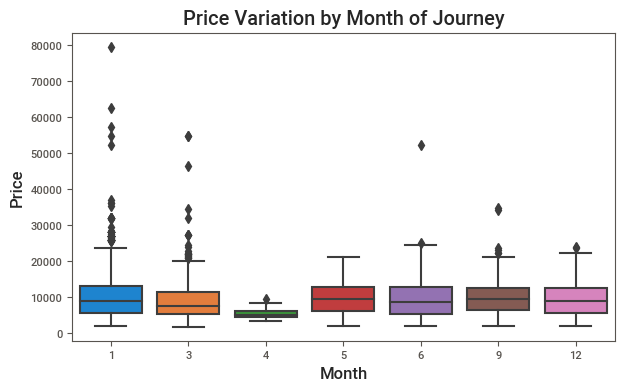

In [34]:
#  Date Analysis
# Convert 'Date_of_Journey' to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
# Extract month from 'Date_of_Journey'
df['Journey_Month'] = df['Date_of_Journey'].dt.month
# Box plot of Price by Month
plt.figure(figsize=(7, 4))
sns.boxplot(x='Journey_Month', y='Price', data=df)
plt.title('Price Variation by Month of Journey')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

In [35]:
# Correlation Analysis
corr_matrix = df.corr()
print(corr_matrix['Price'])

Price                     1.000000
Duration_hours            0.508985
Duration_minutes         -0.115713
Total_Duration_minutes    0.512132
Journey_Month             0.010700
Name: Price, dtype: float64


In [36]:
# grouping the features of the dataset with same datatypes into 2 different datframes
df1= df[["Source","Destination","Total_Stops"]]
df2= df[["Date_of_Journey","Dep_Time","Arrival_Time"]]

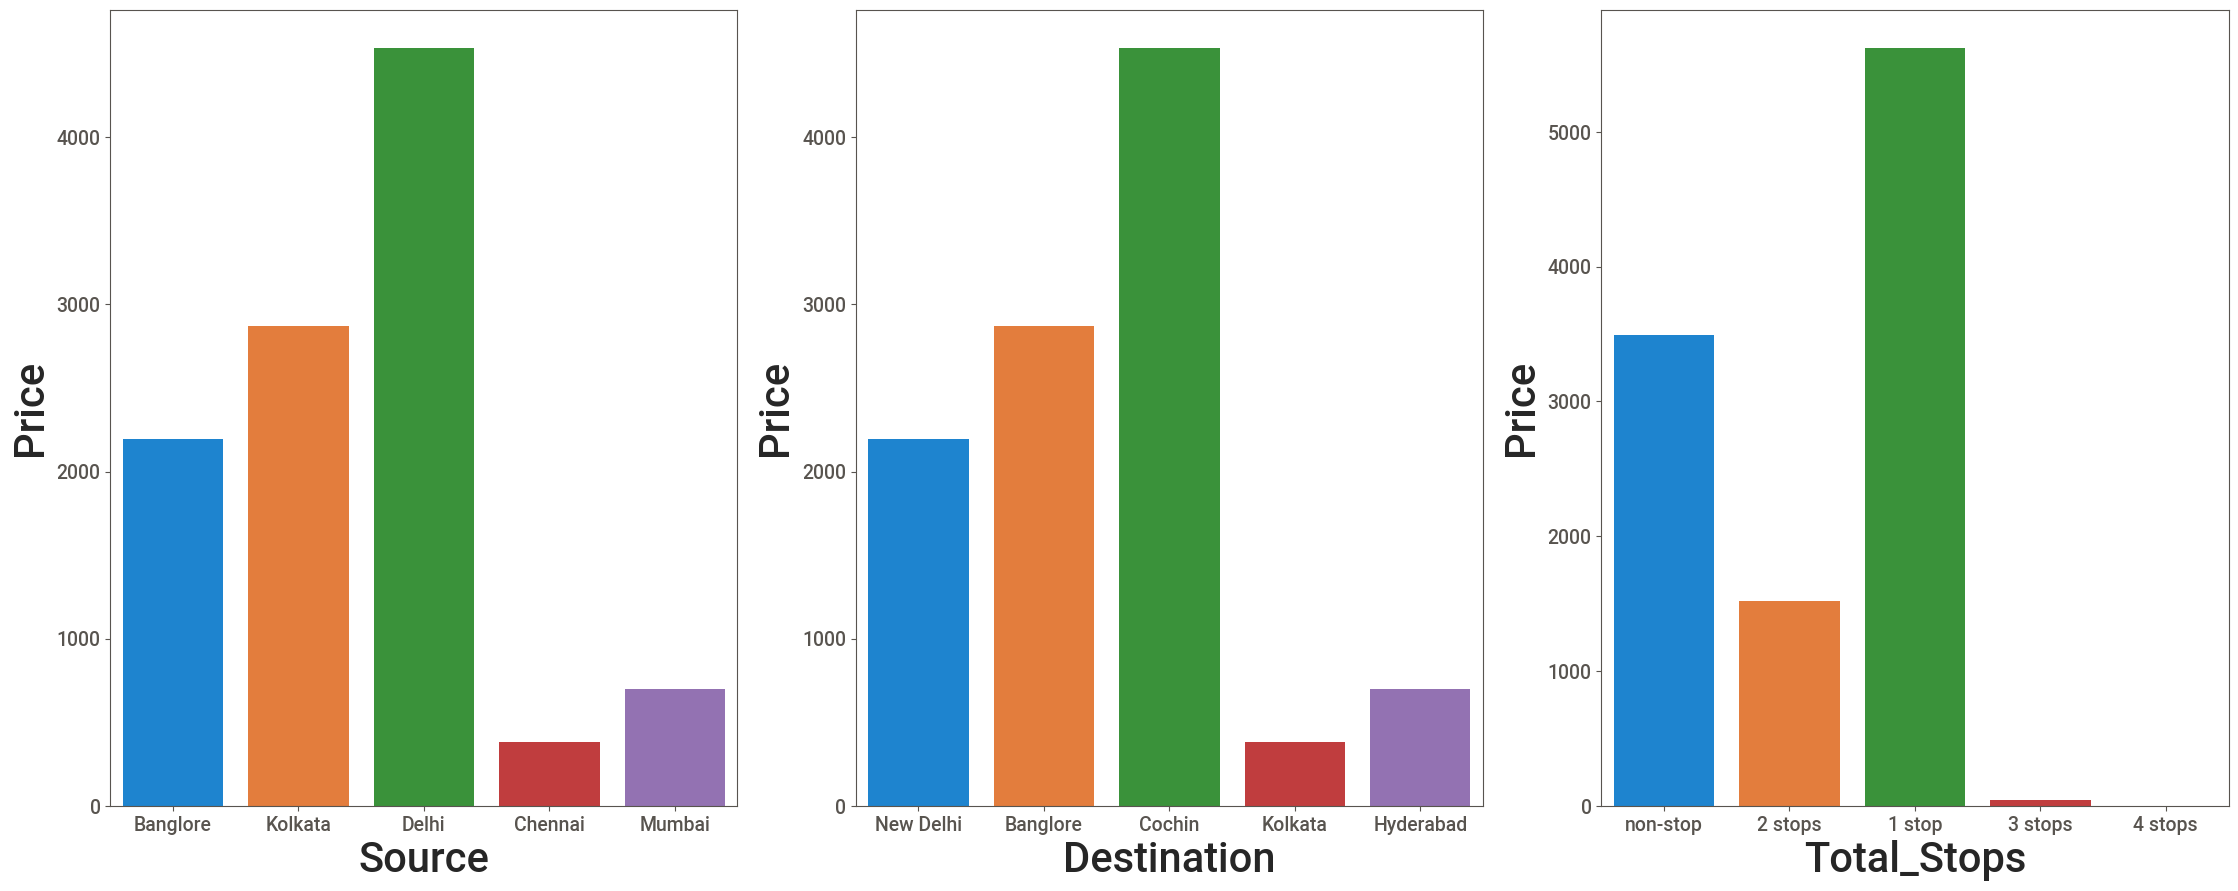

In [37]:
# analysing each feature of df1 with respect to target i.e. price
plt.figure(figsize=(30,35), facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber<=7 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=df1[column])
        plt.xlabel(column,fontsize=30)
        plt.ylabel('Price',fontsize=30)
        ax.tick_params(labelsize=14)

    plotnumber+=1
plt.tight_layout()

In [38]:
# Analysing the relationship between 'Source' and 'Destination' using a crosstab
source_dest_crosstab = pd.crosstab(df1['Source'], df1['Destination'])
print("Crosstab between Source and Destination:\n", source_dest_crosstab)

Crosstab between Source and Destination:
 Destination  Banglore  Cochin  Hyderabad  Kolkata  New Delhi
Source                                                      
Banglore            0       0          0        0       2197
Chennai             0       0          0      381          0
Delhi               0    4537          0        0          0
Kolkata          2871       0          0        0          0
Mumbai              0       0        697        0          0


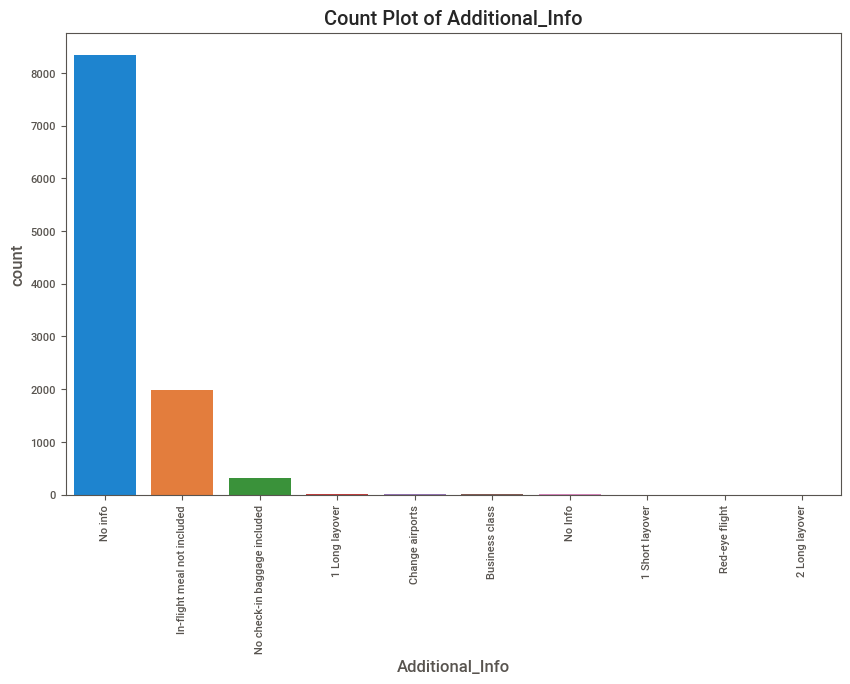

In [41]:
# Analysing the distribution of 'Additional_Info' using
# a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Additional_Info', data=df, order=df['Additional_Info'].value_counts().index)
plt.title('Count Plot of Additional_Info')
plt.xticks(rotation=90)
plt.show()

In [39]:
# Extracting the month and day of the week from
# 'Date_of_Journey' and analyze their relationship with 
# 'Dep_Time'
df2['Day_of_Week'] = df2['Date_of_Journey'].dt.day_name()

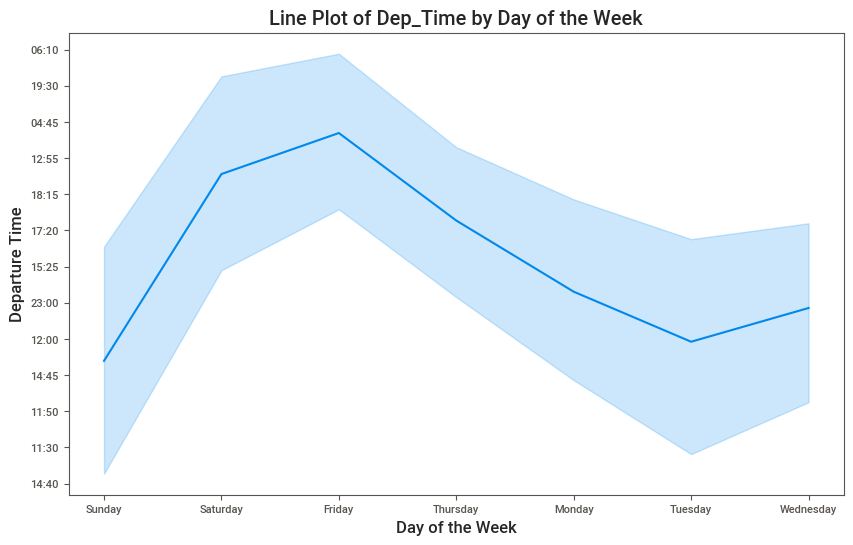

In [40]:
# Visualizing the relationship between 'Day_of_Week' and
# 'Dep_Time'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day_of_Week', y='Dep_Time', data=df2)
plt.title('Line Plot of Dep_Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Departure Time')
plt.xticks(rotation=0)
plt.show()

### Insights from Bivariate analysis:

>Jetairways has the highest number of flights and Trujet has the least number of flights 

> Jetairways business is the most expensive flight

> Trujet is the least expensive flight 

> Flights from Delhi are most expensive

> Flights to cochin are most expensive

> Prices of flights are highest in January and lowest in April

> flights having 1 stop is most expensive followed by nonstop flights

> The flights from Delhi to Cochin has the highest frequency

> The flights from Chennai to Kolkata has the least frequency

> By analysing "Additional_info" column we found out that 80% has no information and the remaining is redundant data

> The peak departure time is on Friday at 12:55am 

> the price tends to increase as the duration (in both hours and total minutes) increases, suggesting a positive relationship. However, the month of the journey has almost no influence on the price. 

> Additionally, the correlation with 'Duration_minutes' is very weak, indicating that it has minimal impact on the price.


In [41]:
# checking all the columns that are present
print(df.columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration_hours', 'Duration_minutes',
       'Total_Duration_minutes', 'Journey_Month'],
      dtype='object')


In [42]:
# we will drop the columns below as we converted
# it just for the purpose of EDA 
# if we retain it we will have huge number of 
# missing values
df.drop("Duration_hours", axis = 1, inplace = True)
df.drop("Duration_minutes", axis = 1, inplace = True)
df.drop("Total_Duration_minutes", axis = 1, inplace = True)
df.drop("Journey_Month", axis = 1, inplace = True)

In [43]:
# verifying if all the columns mentioned above are dropped
print(df.columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


## 4. Data Preprocessing

In [44]:
# checking the missing values present in the data
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Insights on null values
> There are a total of 2 null values

> there is 1 null value on the route column and 1 null value in total_stops column

> as there are only 2 null values we will drop it

In [45]:
# dropping missing values from route and total_stops columns
df.dropna(subset=['Route'], inplace=True)
df.dropna(subset=['Total_Stops'], inplace=True)

In [46]:
# Re check for missing values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Check for duplicates and handling them

In [47]:
df.duplicated().sum()

220

In [48]:
#Remove Duplicate Rows
df.drop_duplicates(inplace=True)

In [49]:
# Re check for duplicate values
df.duplicated().sum()

0

In [50]:
df.size

115082

In [51]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### Check for outliers 

<Axes: xlabel='Price'>

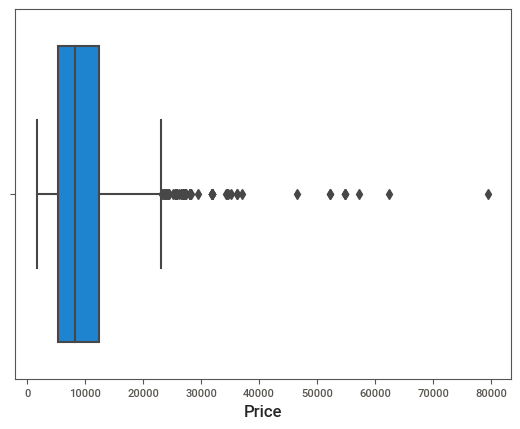

In [52]:
# check outliers in price
sns.boxplot(x=df.Price)

* We can see many outliers in Price column.
* outliers in Price are seen toward right side. 
* To handle those outliers
* IQR- Use this method when data is not normal
* 3-sigma rule - use this method when data is normal

<b><font color="green">Steps:</font></b>
* find Q1 and Q3
* fid IQR=Q3-Q1
* find lower limit and upper limit
* lower_limit=Q1-1.5*IQR
* upper_limit=Q3+1.5*IQR
* Find records/values which are greater than upper limit and less than lower limit



In [53]:
# find Q1 and Q3
Q1=df['Price'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['Price'].quantile(0.75)
print("upper quartile",Q3)


lower quartile 5224.0
upper quartile 12344.75


In [54]:
# find IQR
IQR=Q3-Q1
IQR

7120.75

In [55]:
# find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print("lower limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower limit is -5457.125
upper_limit is 23025.875


In [56]:
# find values above upper_limit
df.loc[df['Price']>upper_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,2019-01-03,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,2019-01-03,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,2019-06-03,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,2019-06-03,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


In [57]:
len(df.loc[df['Price']>upper_limit])/len(df)

0.008984897725100364

In [58]:
# find values below lower limit
df.loc[df['Price']<lower_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [59]:
# How to handle outliers?
# since data is not normal 
# will replace outliers with median
df.loc[df['Price']>upper_limit,"Price"]=df["Price"].median()

<Axes: xlabel='Price'>

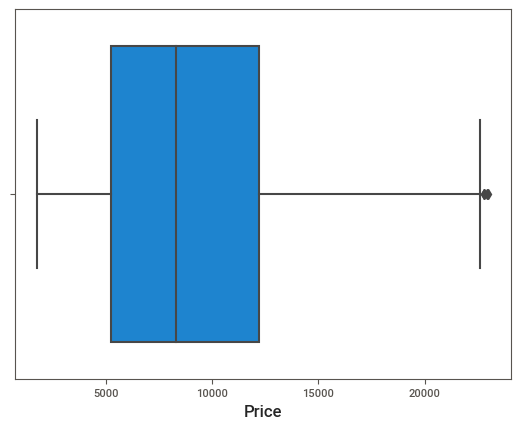

In [60]:
# check are there any outliers in Price
sns.boxplot(x=df.Price)

### Handling Categorical Data

#### i. Airline

In [61]:
df.Airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [62]:
## Encoding Airline, Source and Destination using Label Encoder

from sklearn.preprocessing import LabelEncoder
#importing label encoder from sklearn 

label = LabelEncoder()#object creation

df.Airline=label.fit_transform(df.Airline)
#applying label encoder 

In [63]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### ii. Source

In [64]:
df.Source.value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [65]:
df.Source=label.fit_transform(df.Source)

In [66]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,2019-03-24,0,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,2019-01-05,3,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,2019-09-06,2,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,2019-12-05,3,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,2019-01-03,0,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### iii. Destination

In [67]:
df.Destination.value_counts()

Cochin       4345
Banglore     2860
New Delhi    2179
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [68]:
df.Destination=label.fit_transform(df.Destination)

In [69]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,2019-03-24,0,4,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,2019-01-05,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,2019-09-06,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,2019-12-05,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,2019-01-03,0,4,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### iv. Total Stops

In [70]:
## Manual encoding Total_Stops
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,
            '3 stops':3,'4 stops':4},inplace=True)

In [71]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,2019-03-24,0,4,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,1,2019-01-05,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,4,2019-09-06,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,3,2019-12-05,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,3,2019-01-03,0,4,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


### Handling datetime data

In [72]:
df.Arrival_Time.unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [73]:
df.Arrival_Time.value_counts()

19:00           412
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:50 04 May      1
00:50 02 Jun      1
00:25 02 Jun      1
08:55 13 Mar      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [74]:
df.Dep_Time.unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [75]:
df.Duration.unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [76]:
# Convert date_of_journey column to datetime object
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y")

# Extract date and month from date_of_journey
df['Journey_Date'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month

# Extract hours and minutes from dep_time
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

# Extract hours and minutes from arrival_time
df['Arr_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

# extract hours and minutes from Duration
df['Duration_hours'] = df['Duration'].str.extract(r'(\d+)h').astype(float)
df['Duration_minutes'] = df['Duration'].str.extract(r'(\d+)min').astype(float)
df['Duration_hours'].fillna(0, inplace=True)
df['Duration_minutes'].fillna(0, inplace=True)



In [77]:
df.head(50)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_hours,Duration_minutes
0,3,2019-03-24,0,4,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,22,20,1,10,2.0,0.0
1,1,2019-01-05,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,1,5,50,13,15,7.0,0.0
2,4,2019-09-06,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,6,9,9,25,4,25,19.0,0.0
3,3,2019-12-05,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,5,12,18,5,23,30,5.0,0.0
4,3,2019-01-03,0,4,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,1,16,50,21,35,4.0,0.0
5,8,2019-06-24,3,0,CCU → BLR,09:00,11:25,2h 25m,0,No info,3873,24,6,9,0,11,25,2.0,0.0
6,4,2019-12-03,0,4,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1,In-flight meal not included,11087,3,12,18,55,10,25,15.0,0.0
7,4,2019-01-03,0,4,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1,No info,22270,3,1,8,0,5,5,21.0,0.0
8,4,2019-12-03,0,4,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1,In-flight meal not included,11087,3,12,8,55,10,25,25.0,0.0
9,6,2019-05-27,2,1,DEL → BOM → COK,11:25,19:15,7h 50m,1,No info,8625,27,5,11,25,19,15,7.0,0.0


> Dropping Route column as we have the numerical equal of the data in Total_stops column 

>  Dropping Additional_info column as it is considered redundant data and isn't useful for model building

In [78]:
df.drop(["Route"],axis=1,inplace=True)
df.drop(["Additional_Info"],axis=1,inplace=True)

In [79]:
# we have extracted the journey date and journey month as 2 separate columns so we drop date_of_journey
df.drop(columns=['Date_of_Journey'],inplace=True)

In [80]:
# we have extracted the dep_hour and dep_minute as 2 separate columns so we drop dep_time
df.drop(columns=['Dep_Time'],inplace=True)

In [81]:
# we have extracted the Arr_hour and Arr_minute as 2 separate columns so we drop Arrival_time
df.drop(columns=['Arrival_Time'],inplace=True)

In [82]:
# we drop the duration column as we have extracted it as 2 separate columns 
df.drop(columns=['Duration'],inplace=True)

In [83]:
# duration_minutes contains redundant data
df.drop(columns=['Duration_minutes'],inplace=True)

In [84]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_hours
0,3,0,4,0,3897,24,3,22,20,1,10,2.0
1,1,3,0,2,7662,5,1,5,50,13,15,7.0
2,4,2,1,2,13882,6,9,9,25,4,25,19.0
3,3,3,0,1,6218,5,12,18,5,23,30,5.0
4,3,0,4,1,13302,3,1,16,50,21,35,4.0


### Scaling Data

In [85]:
df.head(10)

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_hours
0,3,0,4,0,3897,24,3,22,20,1,10,2.0
1,1,3,0,2,7662,5,1,5,50,13,15,7.0
2,4,2,1,2,13882,6,9,9,25,4,25,19.0
3,3,3,0,1,6218,5,12,18,5,23,30,5.0
4,3,0,4,1,13302,3,1,16,50,21,35,4.0
5,8,3,0,0,3873,24,6,9,0,11,25,2.0
6,4,0,4,1,11087,3,12,18,55,10,25,15.0
7,4,0,4,1,22270,3,1,8,0,5,5,21.0
8,4,0,4,1,11087,3,12,8,55,10,25,25.0
9,6,2,1,1,8625,27,5,11,25,19,15,7.0


In [86]:
x=df.drop("Price",axis=1)
x.head()

,Airline,Source,Destination,Total_Stops,Journey_Date,Journey_Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_hours
0,3,0,4,0,24,3,22,20,1,10,2.0
1,1,3,0,2,5,1,5,50,13,15,7.0
2,4,2,1,2,6,9,9,25,4,25,19.0
3,3,3,0,1,5,12,18,5,23,30,5.0
4,3,0,4,1,3,1,16,50,21,35,4.0


In [1]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
print(x)

NameError: name 'x' is not defined

## 5. Feature Engineering

### <font color="green">Droping irrelevant columns and Selecting best features

* Drop the columns which has very less correlation with target variables.
* Drop one of the column if two input variables has high correlation

In [88]:
df.corr()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Duration_hours
Airline,1.000000,-0.012172,0.023221,-0.194549,-0.041462,0.031915,-0.008680,-0.032267,-0.062421,-0.005438,-0.073045,-0.151962
Source,-0.012172,1.000000,-0.833791,0.194203,0.074518,0.007833,0.062742,0.060218,-0.056609,0.028257,0.021392,0.167051
Destination,0.023221,-0.833791,1.000000,-0.423515,-0.271860,-0.026926,-0.078452,-0.061608,0.096078,-0.051465,0.045565,-0.353770
Total_Stops,-0.194549,0.194203,-0.423515,1.000000,0.662478,-0.035371,0.065438,-0.067523,-0.002695,0.051476,-0.107099,0.730156
Price,-0.041462,0.074518,-0.271860,0.662478,1.000000,-0.147984,0.068811,0.004967,-0.053522,0.045999,-0.097136,0.567567
Journey_Date,0.031915,0.007833,-0.026926,-0.035371,-0.147984,1.000000,-0.265200,-0.007617,-0.013512,-0.001133,-0.019622,-0.046812
Journey_Month,-0.008680,0.062742,-0.078452,0.065438,0.068811,-0.265200,1.000000,0.028462,0.001922,-0.003041,-0.023619,0.056828
Dep_Hour,-0.032267,0.060218,-0.061608,-0.067523,0.004967,-0.007617,0.028462,1.000000,-0.015068,-0.003827,0.072989,-0.000648
Dep_Minute,-0.062421,-0.056609,0.096078,-0.002695,-0.053522,-0.013512,0.001922,-0.015068,1.000000,0.046564,-0.021353,-0.022147
Arr_Hour,-0.005438,0.028257,-0.051465,0.051476,0.045999,-0.001133,-0.003041,-0.003827,0.046564,1.000000,-0.152036,0.065586


<Axes: >

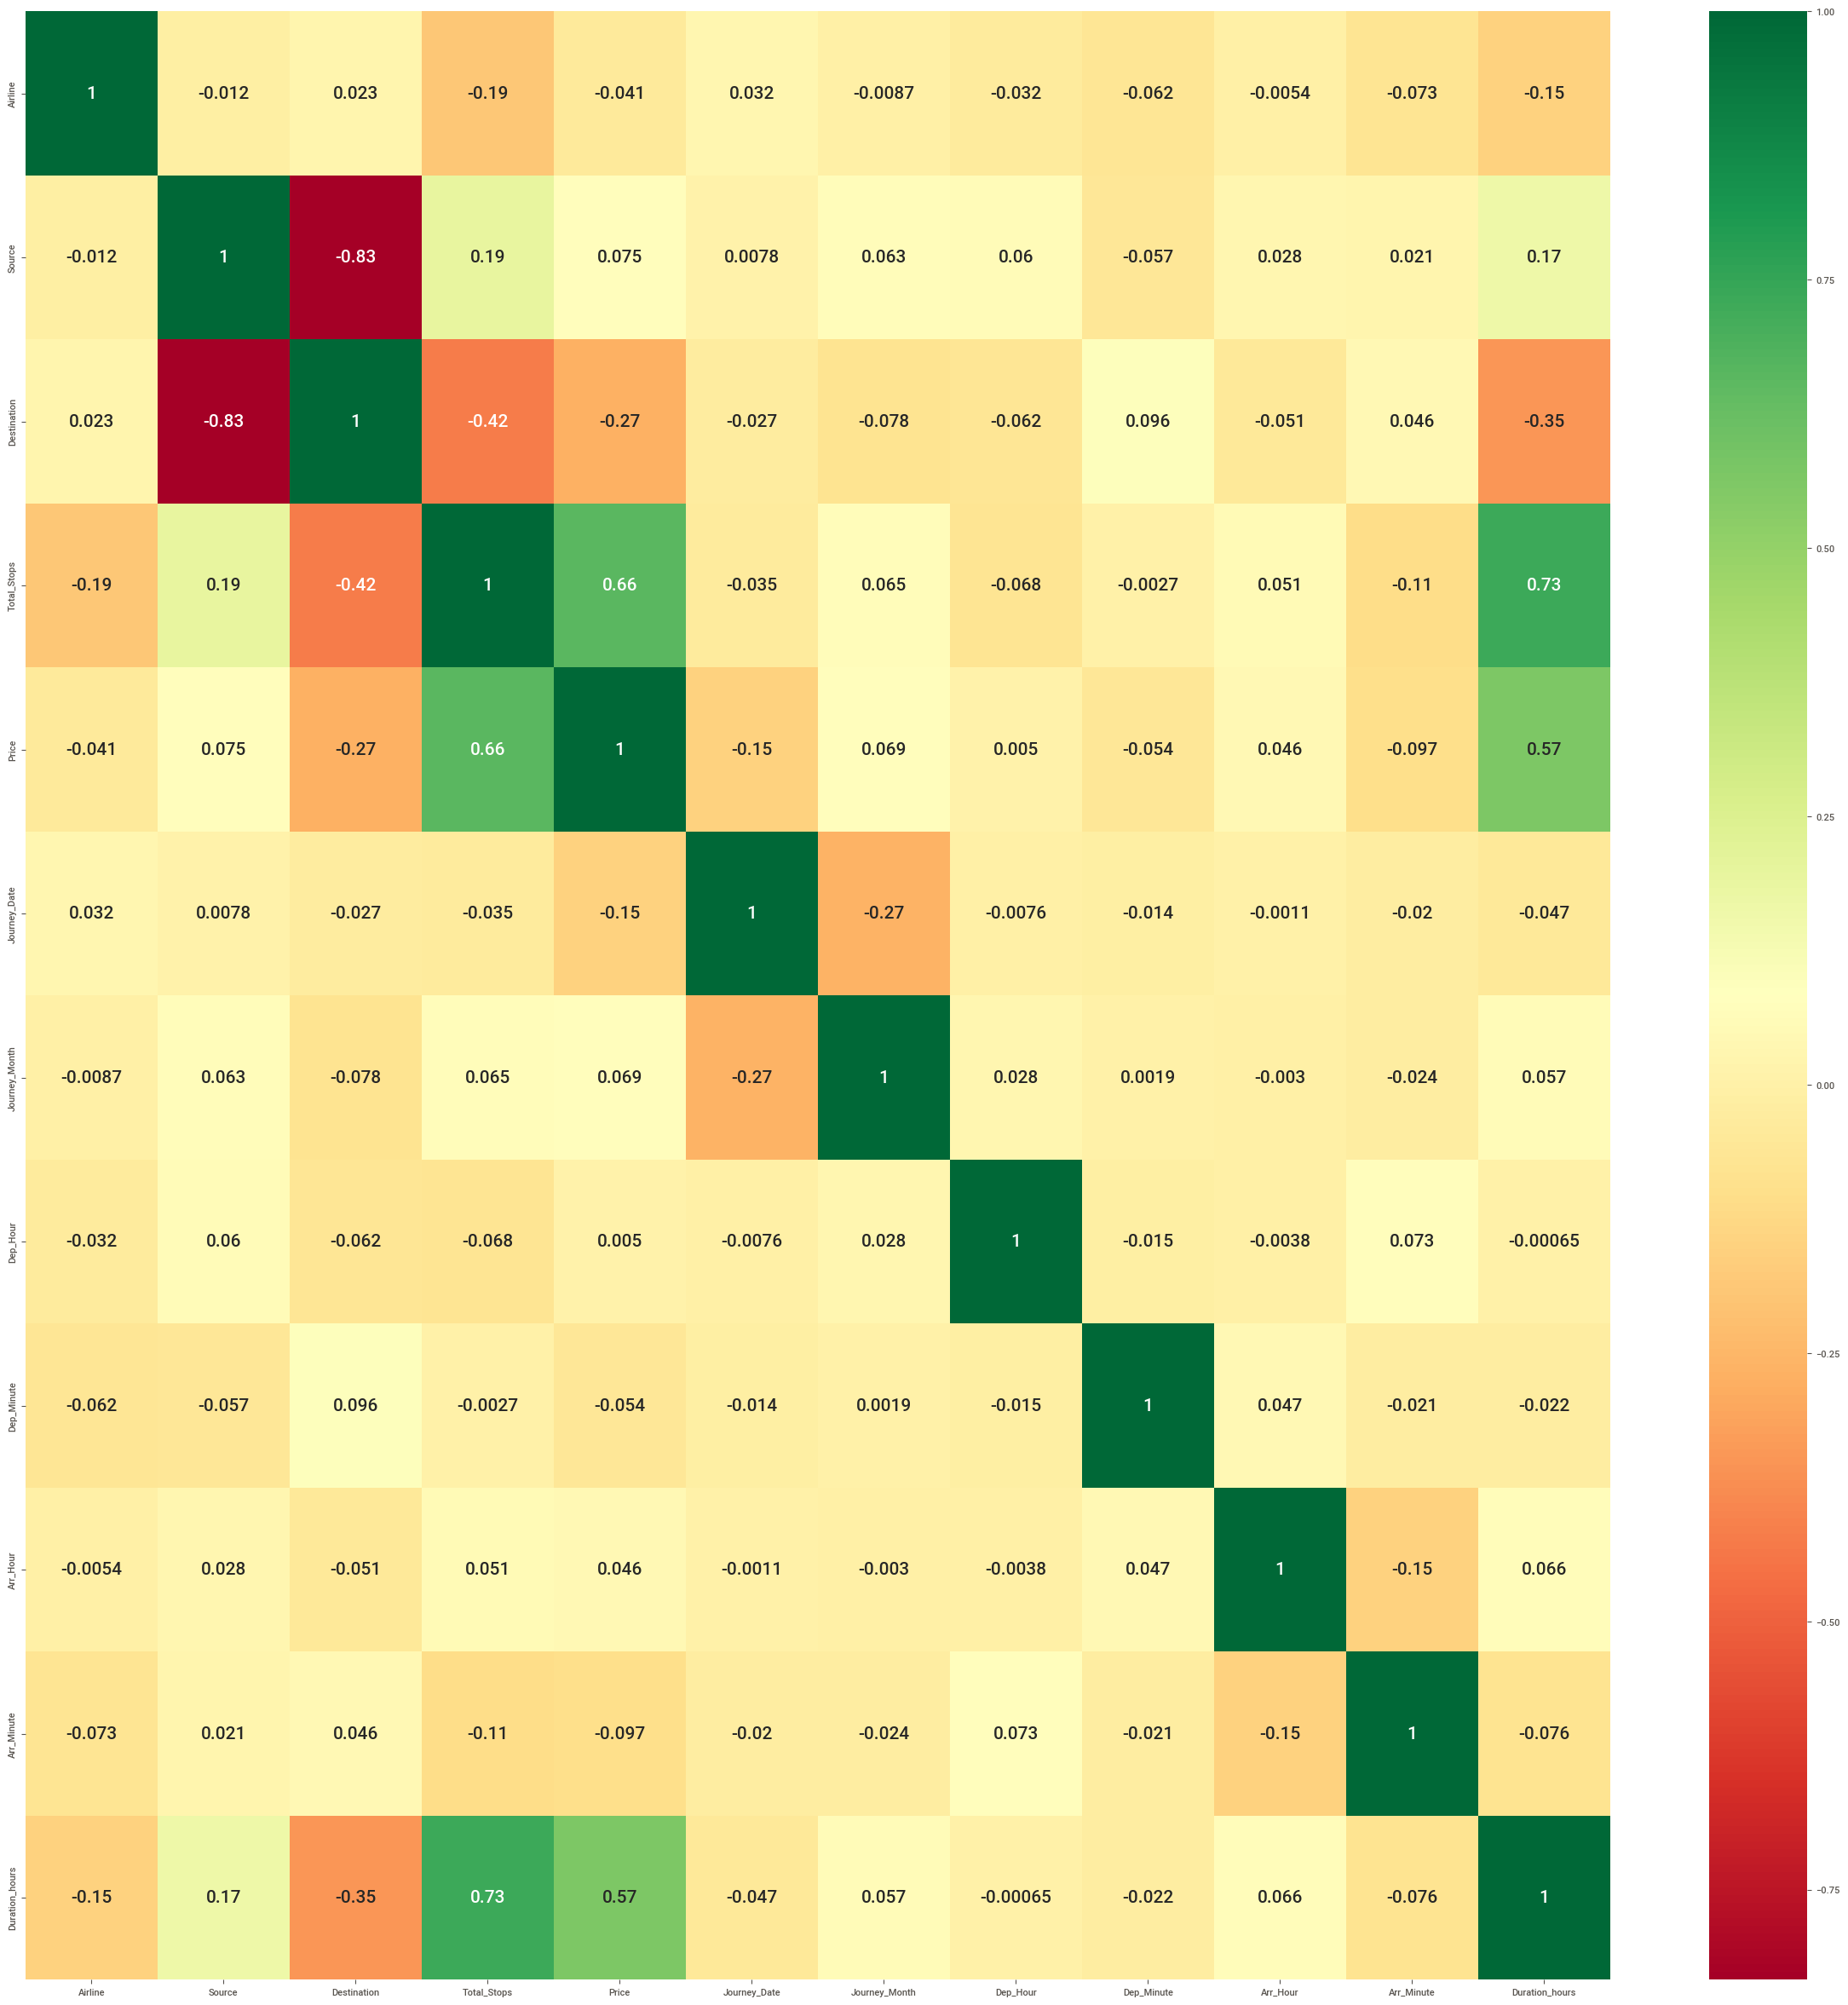

In [89]:
# checking correlation between target and predictors
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

<Axes: >

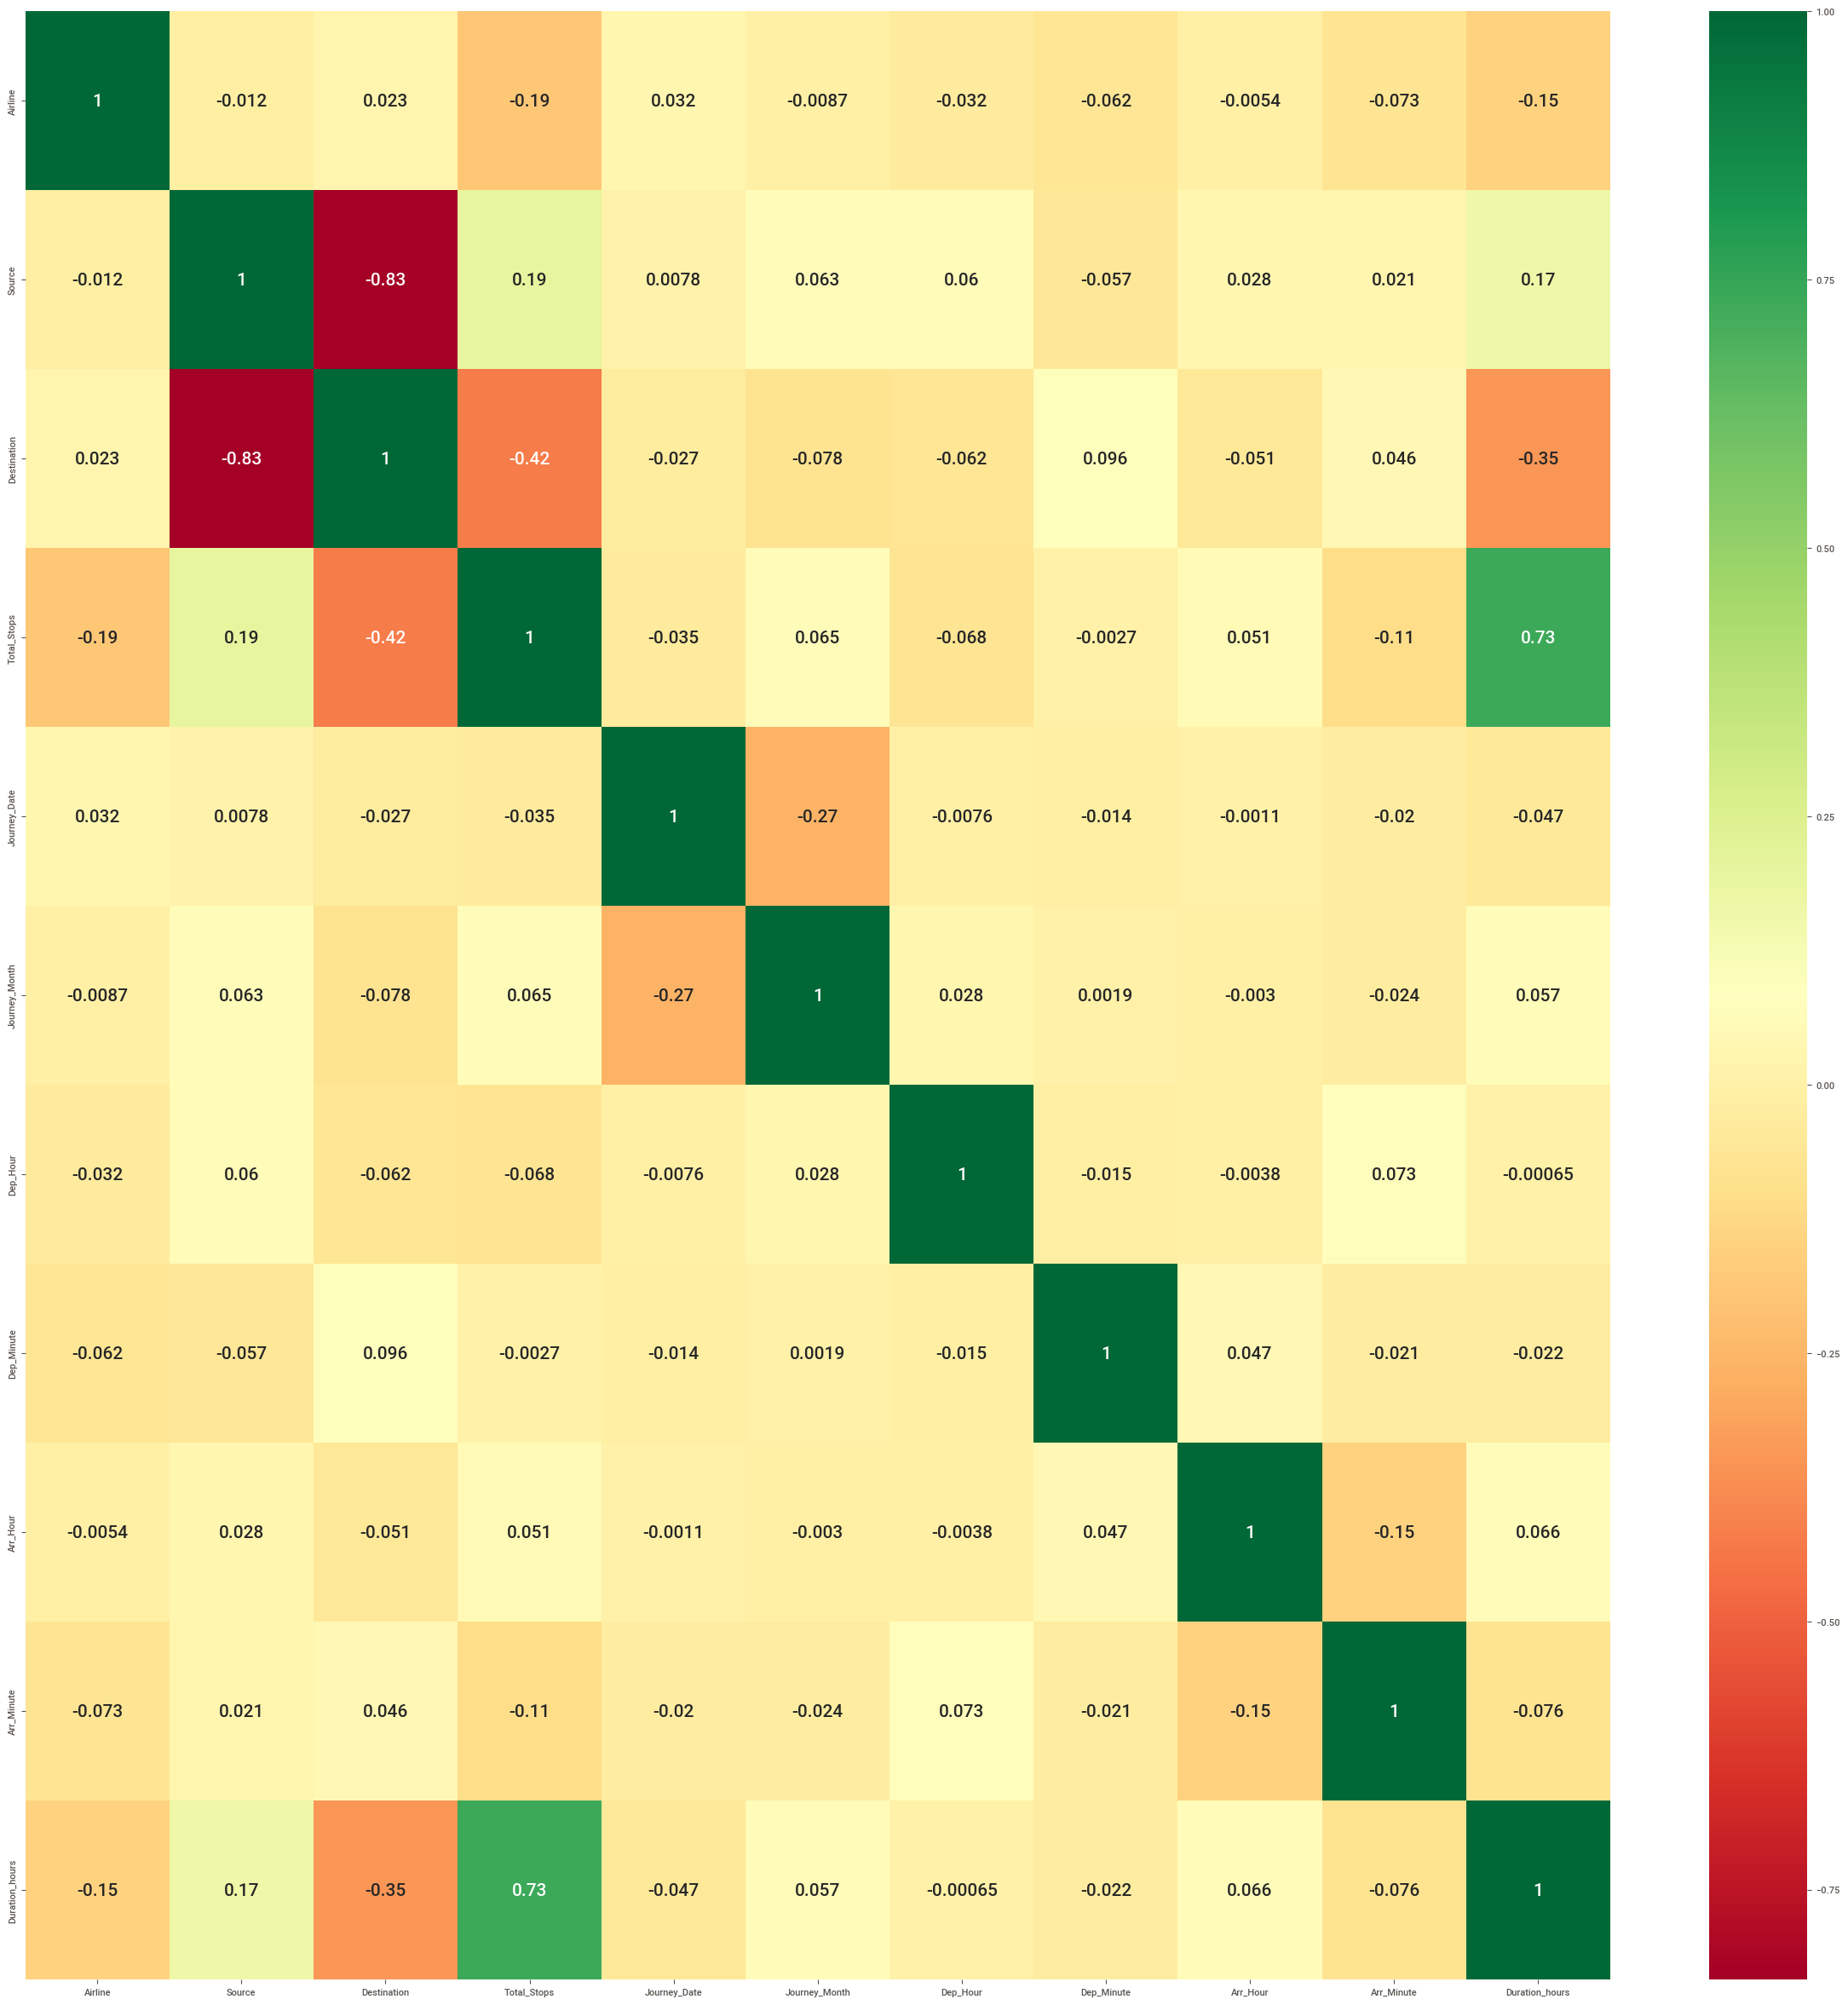

In [90]:
# checking correlation between independent variables
df3=df.drop('Price',axis=1)

plt.figure(figsize=(30, 30))
sns.heatmap(df3.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [139]:
# separating predictors and target 
x=df.drop(["Price"],axis=1)
y=df["Price"]

[0.13204154 0.0249306  0.050216   0.28073545 0.10499861 0.0551918
 0.03304348 0.03538015 0.03238745 0.03210187 0.21897305]


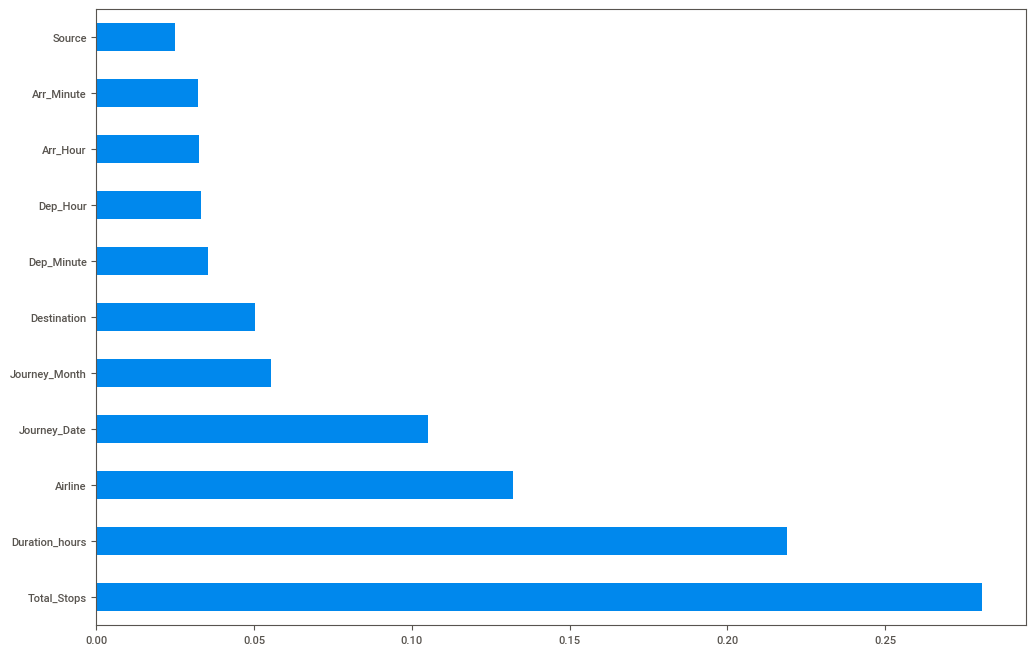

In [140]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)
print(selection.feature_importances_)
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Heat map analysis

### Linearity
* We include columns which has high correlation with target.
* We drop columns which has less correlation with target

### Little or no multicollinearity
* We include columns which has less correlation among each other
* We drop one of the column if two input variable have high correlation.


## 6. Model Creation

> x is the predictors and y is the target

In [141]:
# separating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [142]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7846, 11)
(7846,)
(2616, 11)
(2616,)


In [143]:
x.shape

(10462, 11)

In [144]:
y.shape

(10462,)

### i. Linear Regression

In [145]:
# importing the model library 
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)

In [146]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [147]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

8231676.957926476


In [148]:
mae=mean_absolute_error(y_test,y_pred)
print(mae)

2256.412124114206


In [149]:
import math
rmse=math.sqrt(mae)
print(rmse)

47.501706538967696


In [150]:
model1_score=r2_score(y_test,y_pred)
model1_score

0.4997909127908763

## ii. Decision Tree

In [151]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor(max_depth=15,min_samples_split=25,
                             min_samples_leaf=9,max_features=0.8,min_impurity_decrease=0.01)
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

In [152]:
mse2=mean_squared_error(y_test,y_pred2)
print(mse2)

3560254.278490189


In [153]:
mae2=mean_absolute_error(y_test,y_pred2)
mae2

1267.8462854330403

In [154]:
model2_score=r2_score(y_test,y_pred2)
model2_score

0.7836562887515756

### iii. Random Forest

In [155]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor(n_estimators=100,max_depth=15,
                            min_samples_split=5,min_samples_leaf=5,
                            max_features=0.8,bootstrap=True)
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)

In [156]:
mse3=mean_squared_error(y_test,y_pred3)
print(mse3)

2773668.729053899


In [157]:
mae3=mean_absolute_error(y_test,y_pred3)
mae3

1141.2111830183503

In [158]:
model3_score=r2_score(y_test,y_pred3)
model3_score

0.8314542334117513

### iv. Gradient Boosting

In [159]:
from sklearn.ensemble import GradientBoostingRegressor
model4=GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,
                                max_depth=5,min_samples_split=10,
                                min_samples_leaf=2,subsample=0.8)
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)

In [160]:
mse4=mean_squared_error(y_test,y_pred4)
print(mse4)

2851806.689767974


In [161]:
mae4=mean_absolute_error(y_test,y_pred4)
mae4

1212.6585180983877

In [162]:
model4_score=r2_score(y_test,y_pred4)
model4_score

0.826706073564743

### v. ANN

In [129]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [163]:
import tensorflow as tf

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [165]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1) 
])

In [166]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [167]:
model.fit(x_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
246/246 [==============================] - 3s 5ms/step - loss: 91677664.0000
Epoch 2/50
246/246 [==============================] - 1s 5ms/step - loss: 55990008.0000
Epoch 3/50
246/246 [==============================] - 1s 5ms/step - loss: 18184456.0000
Epoch 4/50
246/246 [==============================] - 1s 5ms/step - loss: 11407906.0000
Epoch 5/50
246/246 [==============================] - 1s 5ms/step - loss: 10123989.0000
Epoch 6/50
246/246 [==============================] - 1s 5ms/step - loss: 9562766.0000
Epoch 7/50
246/246 [==============================] - 1s 5ms/step - loss: 9238656.0000
Epoch 8/50
246/246 [==============================] - 1s 5ms/step - loss: 9023166.0000
Epoch 9/50
246/246 [==============================] - 1s 5ms/step - loss: 8868066.0000
Epoch 10/50
246/246 [==============================] - 1s 5ms/step - loss: 8756688.0000
Epoch 11/50
246/246 [==============================] - 1s 5ms/step - loss: 8658500.0000
Epoch 12/50
246/246 [===============

In [168]:
y_predANN = model.predict(x_test_scaled)

82/82 [==============================] - 0s 3ms/step


In [169]:
mseANN =mean_squared_error(y_test,y_predANN)
print(mseANN)

7192991.133837636


In [170]:
maeANN=mean_absolute_error(y_test,y_predANN)
maeANN

2086.7283323328793

In [171]:
modelANN_score=r2_score(y_test,y_predANN)
modelANN_score

0.5629080747762283

## Summary

In [172]:
print("R-squared (R2)")
print("LinearRegression Score :", model1_score)
print("DecisionTreeRegressor Score:", model2_score)
print("RandomForestRegressor Score:", model3_score)
print("GradientBoostingRegressor Score:", model4_score)
print("ANN Score:", modelANN_score)

R-squared (R2)
LinearRegression Score : 0.4997909127908763
DecisionTreeRegressor Score: 0.7836562887515756
RandomForestRegressor Score: 0.8314542334117513
GradientBoostingRegressor Score: 0.826706073564743
ANN Score: 0.5629080747762283


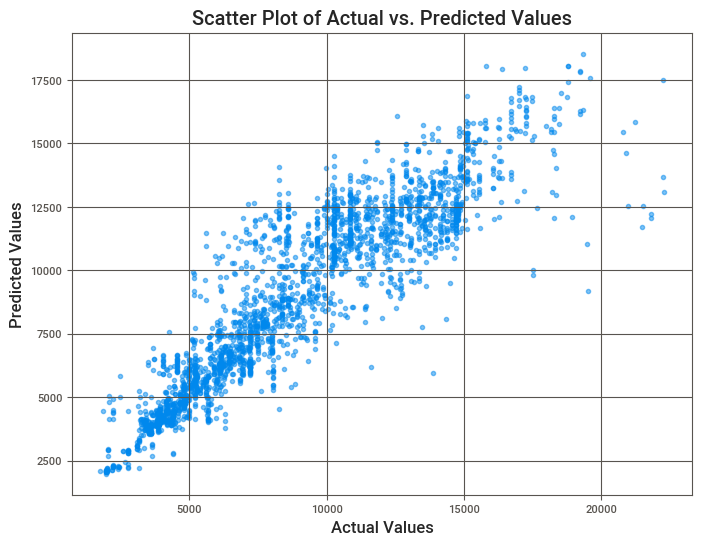

In [173]:
# Scatter plot for the RandomForestRegressor that gives highest score
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred3, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.grid(True)
plt.show()

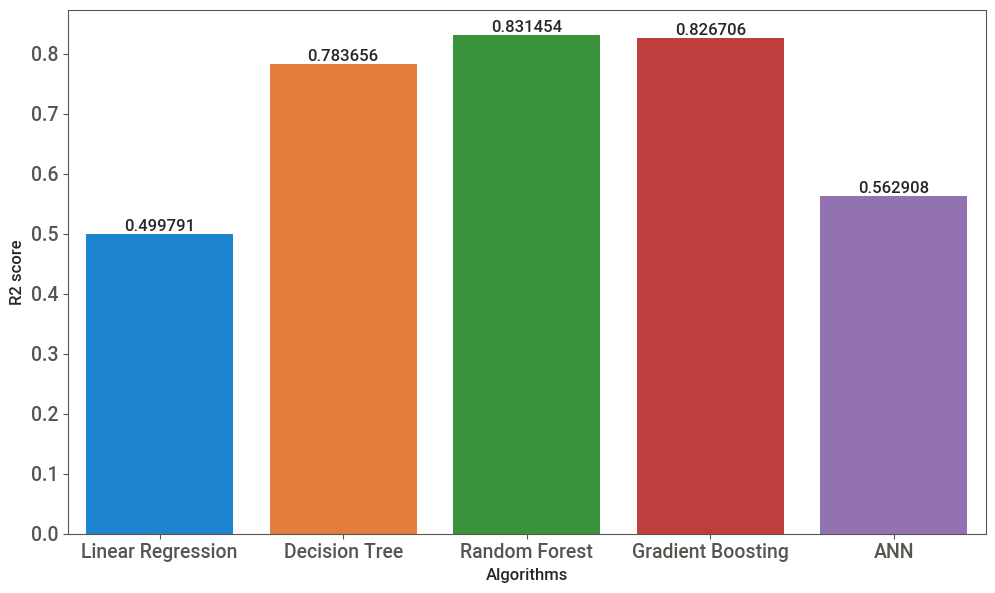

In [174]:
# Visualizing the model scores using a bar chart
algorithms = ["Linear Regression","Decision Tree","Random Forest","Gradient Boosting","ANN"]
scores=[model1_score,model2_score,model3_score,model4_score,modelANN_score]
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("R2 score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()
plt.tick_params(labelsize=14)

## Conclusion

> The model that gives the best score is Random Forest with r2 score of 0.83

> The second best model is Gradient Boosting with a r2 score of 0.82

> The features which impact the target prediction is Duration and Total_Stops